## 나비와 나방 분류

https://www.kaggle.com/datasets/aseemdandgaval/23-pet-breeds-image-classification

In [1]:
root = './datasets/butterfly/original/'

In [2]:
from glob import glob
import os

directories = glob(os.path.join(root, '*'))
directory_names = []
for directory in directories:
    directory_names.append(directory[directory.rindex('\\') + 1:])

print(directory_names)

['ADONIS', 'AFRICAN GIANT SWALLOWTAIL', 'AMERICAN SNOOT', 'AN 88', 'APPOLLO', 'ARCIGERA FLOWER MOTH', 'ATALA', 'ATLAS MOTH', 'BANDED ORANGE HELICONIAN', 'BANDED PEACOCK', 'BANDED TIGER MOTH', 'BECKERS WHITE', 'BIRD CHERRY ERMINE MOTH', 'BLACK HAIRSTREAK', 'BLUE MORPHO', 'BLUE SPOTTED CROW', 'BROOKES BIRDWING', 'BROWN ARGUS', 'BROWN SIPROETA', 'CABBAGE WHITE', 'CAIRNS BIRDWING', 'CHALK HILL BLUE', 'CHECQUERED SKIPPER', 'CHESTNUT', 'CINNABAR MOTH', 'CLEARWING MOTH', 'CLEOPATRA', 'CLODIUS PARNASSIAN', 'CLOUDED SULPHUR', 'COMET MOTH', 'COMMON BANDED AWL', 'COMMON WOOD-NYMPH', 'COPPER TAIL', 'CRECENT', 'CRIMSON PATCH', 'DANAID EGGFLY', 'EASTERN COMA', 'EASTERN DAPPLE WHITE', 'EASTERN PINE ELFIN', 'ELBOWED PIERROT', 'EMPEROR GUM MOTH', 'GARDEN TIGER MOTH', 'GIANT LEOPARD MOTH', 'GLITTERING SAPPHIRE', 'GOLD BANDED', 'GREAT EGGFLY', 'GREAT JAY', 'GREEN CELLED CATTLEHEART', 'GREEN HAIRSTREAK', 'GREY HAIRSTREAK', 'HERCULES MOTH', 'HUMMING BIRD HAWK MOTH', 'INDRA SWALLOW', 'IO MOTH', 'Iphiclus si

In [3]:
for name in directory_names:
    for i, file_name in enumerate(os.listdir(os.path.join(root, name))):
        old_file = os.path.join(root + name + '/', file_name)
        new_file = os.path.join(root + name + '/', name + str(i + 1) + '.png')

        os.rename(old_file, new_file)

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

BATCH_SIZE = 32

image_generator = ImageDataGenerator(rescale = 1./255)

generator = image_generator.flow_from_directory(root, target_size=(244,244), batch_size=BATCH_SIZE, class_mode='categorical')
print(generator.class_indices)

Found 12594 images belonging to 100 classes.
{'ADONIS': 0, 'AFRICAN GIANT SWALLOWTAIL': 1, 'AMERICAN SNOOT': 2, 'AN 88': 3, 'APPOLLO': 4, 'ARCIGERA FLOWER MOTH': 5, 'ATALA': 6, 'ATLAS MOTH': 7, 'BANDED ORANGE HELICONIAN': 8, 'BANDED PEACOCK': 9, 'BANDED TIGER MOTH': 10, 'BECKERS WHITE': 11, 'BIRD CHERRY ERMINE MOTH': 12, 'BLACK HAIRSTREAK': 13, 'BLUE MORPHO': 14, 'BLUE SPOTTED CROW': 15, 'BROOKES BIRDWING': 16, 'BROWN ARGUS': 17, 'BROWN SIPROETA': 18, 'CABBAGE WHITE': 19, 'CAIRNS BIRDWING': 20, 'CHALK HILL BLUE': 21, 'CHECQUERED SKIPPER': 22, 'CHESTNUT': 23, 'CINNABAR MOTH': 24, 'CLEARWING MOTH': 25, 'CLEOPATRA': 26, 'CLODIUS PARNASSIAN': 27, 'CLOUDED SULPHUR': 28, 'COMET MOTH': 29, 'COMMON BANDED AWL': 30, 'COMMON WOOD-NYMPH': 31, 'COPPER TAIL': 32, 'CRECENT': 33, 'CRIMSON PATCH': 34, 'DANAID EGGFLY': 35, 'EASTERN COMA': 36, 'EASTERN DAPPLE WHITE': 37, 'EASTERN PINE ELFIN': 38, 'ELBOWED PIERROT': 39, 'EMPEROR GUM MOTH': 40, 'GARDEN TIGER MOTH': 41, 'GIANT LEOPARD MOTH': 42, 'GLITTERIN

In [5]:
target_name = {v: k for k, v in generator.class_indices.items()}
target_name

{0: 'ADONIS',
 1: 'AFRICAN GIANT SWALLOWTAIL',
 2: 'AMERICAN SNOOT',
 3: 'AN 88',
 4: 'APPOLLO',
 5: 'ARCIGERA FLOWER MOTH',
 6: 'ATALA',
 7: 'ATLAS MOTH',
 8: 'BANDED ORANGE HELICONIAN',
 9: 'BANDED PEACOCK',
 10: 'BANDED TIGER MOTH',
 11: 'BECKERS WHITE',
 12: 'BIRD CHERRY ERMINE MOTH',
 13: 'BLACK HAIRSTREAK',
 14: 'BLUE MORPHO',
 15: 'BLUE SPOTTED CROW',
 16: 'BROOKES BIRDWING',
 17: 'BROWN ARGUS',
 18: 'BROWN SIPROETA',
 19: 'CABBAGE WHITE',
 20: 'CAIRNS BIRDWING',
 21: 'CHALK HILL BLUE',
 22: 'CHECQUERED SKIPPER',
 23: 'CHESTNUT',
 24: 'CINNABAR MOTH',
 25: 'CLEARWING MOTH',
 26: 'CLEOPATRA',
 27: 'CLODIUS PARNASSIAN',
 28: 'CLOUDED SULPHUR',
 29: 'COMET MOTH',
 30: 'COMMON BANDED AWL',
 31: 'COMMON WOOD-NYMPH',
 32: 'COPPER TAIL',
 33: 'CRECENT',
 34: 'CRIMSON PATCH',
 35: 'DANAID EGGFLY',
 36: 'EASTERN COMA',
 37: 'EASTERN DAPPLE WHITE',
 38: 'EASTERN PINE ELFIN',
 39: 'ELBOWED PIERROT',
 40: 'EMPEROR GUM MOTH',
 41: 'GARDEN TIGER MOTH',
 42: 'GIANT LEOPARD MOTH',
 43: 'GLITTER

In [6]:
target_names = []
for target in generator.classes:
    target_names.append(target_name[target])

In [7]:
import pandas as pd

butterfly_df = pd.DataFrame({'file_paths': generator.filepaths, 'target_names': target_names, 'targets': generator.classes})
butterfly_df.file_paths = butterfly_df.file_paths.apply(lambda file_path: file_path.replace('\\', '/'))
butterfly_df

,file_paths,target_names,targets
0,./datasets/butterfly/original/ADONIS/ADONIS1.png,ADONIS,0
1,./datasets/butterfly/original/ADONIS/ADONIS10.png,ADONIS,0
2,./datasets/butterfly/original/ADONIS/ADONIS100...,ADONIS,0
3,./datasets/butterfly/original/ADONIS/ADONIS101...,ADONIS,0
4,./datasets/butterfly/original/ADONIS/ADONIS102...,ADONIS,0
...,...,...,...
12589,./datasets/butterfly/original/ZEBRA LONG WING/...,ZEBRA LONG WING,99
12590,./datasets/butterfly/original/ZEBRA LONG WING/...,ZEBRA LONG WING,99
12591,./datasets/butterfly/original/ZEBRA LONG WING/...,ZEBRA LONG WING,99
12592,./datasets/butterfly/original/ZEBRA LONG WING/...,ZEBRA LONG WING,99


In [9]:
from sklearn.model_selection import train_test_split

train_images,test_images, train_targets, test_targets = \
train_test_split(butterfly_df.file_paths, 
                 butterfly_df.targets, 
                 stratify=butterfly_df.targets, 
                 test_size=0.2, random_state=124)

print(train_targets.value_counts())
print(test_targets.value_counts())

targets
65    150
48    141
17    135
16    132
88    122
     ... 
99     83
34     82
97     82
59     82
87     80
Name: count, Length: 100, dtype: int64
targets
65    37
48    35
17    34
16    33
88    30
      ..
44    21
34    21
59    21
87    20
97    20
Name: count, Length: 100, dtype: int64


In [10]:
from sklearn.model_selection import train_test_split

train_images, validation_images, train_targets, validation_targets = \
train_test_split(train_images, 
                 train_targets, 
                 stratify=train_targets, 
                 test_size=0.2, random_state=124)

print(train_targets.value_counts())
print(validation_targets.value_counts())

targets
65    120
48    113
17    108
16    106
88     98
     ... 
34     66
97     66
59     66
44     66
87     64
Name: count, Length: 100, dtype: int64
targets
65    30
48    28
17    27
16    26
21    24
      ..
98    17
87    16
97    16
59    16
34    16
Name: count, Length: 100, dtype: int64


In [12]:
train_df = butterfly_df.iloc[train_images.index].reset_index(drop=True)
validation_df = butterfly_df.iloc[validation_images.index].reset_index(drop=True)
test_df = butterfly_df.iloc[test_images.index].reset_index(drop=True)
print(train_df.shape)
print(validation_df.shape)
print(test_df.shape)

(8060, 3)
(2015, 3)
(2519, 3)


## 이미지 확인

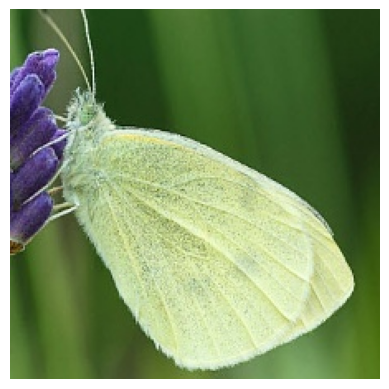

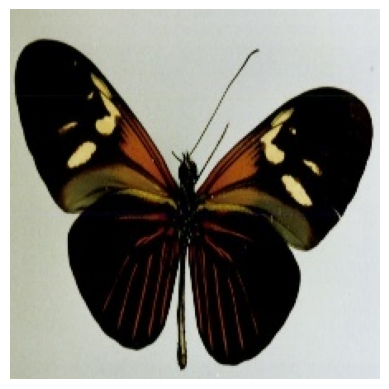

In [13]:
import cv2
import matplotlib.pyplot as plt

image = cv2.cvtColor(cv2.imread(train_df.file_paths.iloc[500]), cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.show()

image = cv2.cvtColor(cv2.imread(train_df.file_paths.iloc[100]), cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.show()

In [66]:
IMAGE_SIZE = 244
BATCH_SIZE = 16

In [84]:
import numpy as np
from tensorflow.keras.utils import Sequence
from sklearn.utils import shuffle
import cv2

# 데이터 세트 생성 class 정의
class Dataset(Sequence):
    # 클래스의 초기화
    # 경로, 타겟, 배치 크기, albumentations 객체, 전처리 하마, 셔플 여부를 인자로 받음
    def __init__(self, file_paths, targets, batch_size=BATCH_SIZE, aug=None, preprocess=None, shuffle=False):
        self.file_paths = file_paths
        self.targets = targets
        self.batch_size = batch_size
        self.aug = aug
        self.preprocess = preprocess
        self.shuffle = shuffle

        # shuffle True 시 진행:
        if self.shuffle:
            # epoch 끝날 때마다 호출
            self.on_epoch_end()

    # 전체 데이터 세트 크기 반환
    def __len__(self):
        # 하나의 배치 사이즈에 필요한 데이터 개수 리턴
        return int(np.ceil(len(self.targets) / self.batch_size))

    # 주어진 인덱스에 해당하는 배치 반환
    def __getitem__(self, index):
        # 파일 경로와 타겟 데이터를 배치 크기만큼 자르고, 이미지를 불러와 처리한 후 배치로 반환
        file_paths_batch = self.file_paths[index * self.batch_size: (index + 1) * self.batch_size]
        targets_batch = self.targets[index * self.batch_size: (index + 1) * self.batch_size]

        # 데이터 배치 저장
        results_batch = np.zeros((file_paths_batch.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

        # 데이터 수만큼 반복
        for i in range(file_paths_batch.shape[0]):
            # RGB로 색상 형식을 변환하여 이미지 가져오기
            image = cv2.cvtColor(cv2.imread(file_paths_batch[i]), cv2.COLOR_BGR2RGB)
            # 이미지 크기 조정
            image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))

            # albumentations이 있다면:
            if self.aug is not None:
                # Augmentor 객체로 이미지 변환
                image = self.aug(image=image)['image']

            # 전처리 함수가 있다면:
            if self.preprocess is not None:
                # 이미지 전처리 진행
                image = self.preprocess(image)

            # 결과 배치에 이미지를 저장
            results_batch[i] = image

        # 결과 배치와 타겟 배치를 반환
        return results_batch, targets_batch
        
    def on_epoch_end(self):
        # shuffle 옵션이 켜져있다면, 데이터를 섞기
        if self.shuffle:
            # epoch 끝날 때마다 데이터 섞기
            self.file_paths, self.targets = shuffle(self.file_paths, self.targets)

In [85]:
def create_dataset(paths, targets, BATCH_SIZE, shuffle=True):   
    return Dataset(paths,
                   targets,
                   batch_size=BATCH_SIZE,
                   shuffle=True)

In [86]:
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

from tensorflow.keras.applications.vgg16 import VGG16, decode_predictions as vgg16_decode_predictions
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, decode_predictions as resnet50v2_decode_predictions
from tensorflow.keras.applications.xception import Xception, decode_predictions as xception_decode_predictions
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, decode_predictions as mobilenetv2_decode_predictions

def predict_and_display(images, titles, model_name):
    figure, axs = plt.subplots(figsize=(22, 4), nrows=1, ncols=len(images))

    # VGG16 모델 선택
    if model_name == 'vgg16':
        model = VGG16()
        decode_predictions = vgg16_decode_predictions
        target_size = (224, 224)
    # ResNet50V2 모델 선택
    elif model_name == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        model = ResNet50V2()
        decode_predictions = resnet50v2_decode_predictions
        target_size = (224, 224)
    # Xception 모델 선택
    elif model_name == 'xception': # Inception을 기초로 한 모델
        model = Xception()
        decode_predictions = xception_decode_predictions
        target_size = (299, 299)
    # MobileNetV2 모델 선택
    elif model_name == 'mobilenet':
        model = MobileNetV2()
        decode_predictions = mobilenetv2_decode_predictions
        target_size = (224, 224)

    for i, image in enumerate(images):
        # 모델 입력 크기에 맞게 이미지 크기 조정
        resized_image = cv2.resize(image, target_size)
        # 이미지 배열로 변환
        image_array = img_to_array(resized_image)
        # 차원 확장 (배열의 첫 번째 차원 확장)
        image_array = np.expand_dims(image_array, axis=0)
        # 이미지 예측
        prediction = model.predict(image_array)
        # 이미지 분류 모델의 예측 결과를 해석
        target = decode_predictions(prediction)
        # 높은 확률로 예측 된 클래스 이름과 확률
        predicted_class = target[0][0][1]
        predicted_probability = np.round(target[0][0][2] * 100, 2)
        
        # 이미지와 예측 결과 표시
        axs[i].imshow(image.astype('int'))
        axs[i].axis('off')
        axs[i].set_title(f"{predicted_class}\n{predicted_probability}%")

        print(target)

In [107]:
import matplotlib.pyplot as plt

def show_images(files_batch, ncols=4, title=None):    
    figure, axs = plt.subplots(figsize=(22, 4), nrows=1, ncols=ncols)
    
    for i in range(ncols):
        # files_batch는 float이므로 int로 변경
        axs[i].imshow(np.array(files_batch[i], dtype='int32'))
        axs[i].axis('off')
        axs[i].set_title(title[i]) 

In [108]:
import albumentations as A

# 각 클래스에서 하나씩 이미지를 샘플링하여 균등한 배치 구성
sampled_df = test_df.groupby('targets', group_keys=False).apply(lambda x: x.sample(1))

# 데이터 경로 및 타겟 담기 (get_dummies를 통해 원-핫 인코딩 진행)
sampled_file_paths = sampled_df['file_paths'].values
sampled_targets = pd.get_dummies(sampled_df['targets']).values # CategoricalCrossEntropy


In [109]:
dataset = create_dataset(sampled_file_paths, sampled_targets, BATCH_SIZE, shuffle=True)

In [110]:
files_batch, targets_batch = next(iter(dataset))
# 레이블 인코딩시, target 차원을 2차원으로 맞춰줘야 한다.
print(files_batch.shape, targets_batch.shape)

(16, 244, 244, 3) (16, 100)


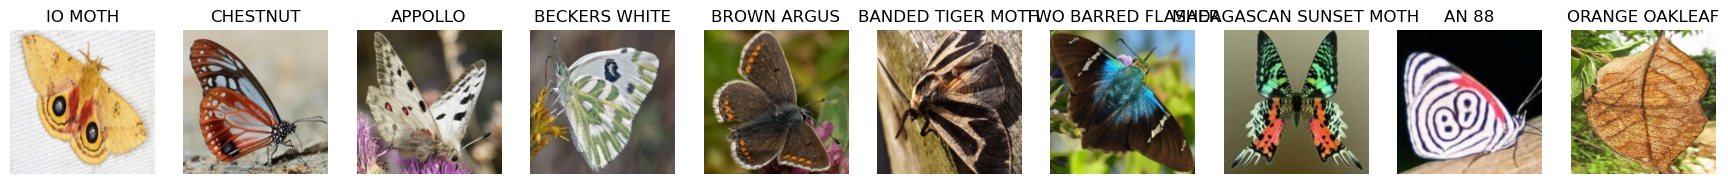

In [112]:
# 이미지 제목 생성
titles = [target_name[np.argmax(target)] for target in targets_batch]

# 정답 출력
show_images(files_batch, ncols=10, title=titles)

vgg16
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[('n02281406', 'sulphur_butterfly', 0.6405701), ('n02280649', 'cabbage_butterfly', 0.18822472), ('n02281787', 'lycaenid', 0.101819485), ('n02277742', 'ringlet', 0.06608759), ('n02276258', 'admiral', 0.0018645938)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step
[[('n07734744', 'mushroom', 0.73278296), ('n03637318', 'lampshade', 0.09695098), ('n12998815', 'agaric', 0.047269963), ('n04380533', 'table_lamp', 0.017729925), ('n02169497', 'leaf_beetle', 0.013506891)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
[[('n02883205', 'bow_tie', 0.3145984), ('n03476684', 'hair_slide', 0.16458997), ('n03944341', 'pinwheel', 0.14291427), ('n03710637', 'maillot', 0.0840273), ('n03710721', 'maillot', 0.035425514)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step
[[('n02281787', 'lycaenid', 0.785851), ('n02276258', 'admiral', 0.17281303), ('n02277742', 'ringlet', 0.037322935), ('n02264363', 'lacewing', 0.0012143989), ('n02280649', 'cabbage_butterfly', 0.001063127)]]
1/1 ━━━━━━━━━━━━━

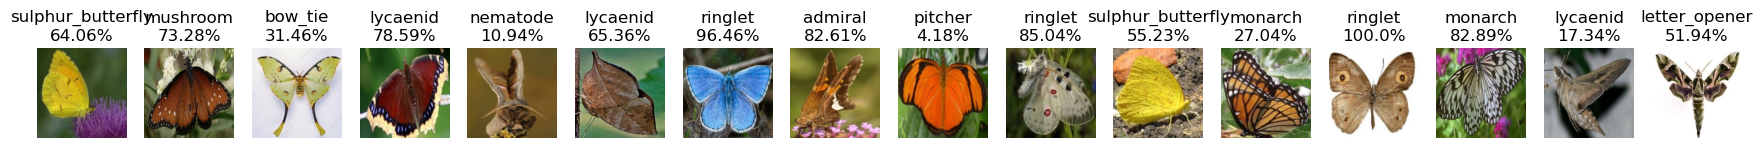

In [106]:
# 예측 모델 출력
print('vgg16')
predict_and_display(files_batch, titles, 'vgg16')

xception
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
[[('n03775546', 'mixing_bowl', 1.0), ('n15075141', 'toilet_tissue', 0.0), ('n02319095', 'sea_urchin', 0.0), ('n02391049', 'zebra', 0.0), ('n02389026', 'sorrel', 0.0)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step
[[('n04127249', 'safety_pin', 0.99649185), ('n03775546', 'mixing_bowl', 0.0035081408), ('n03942813', 'ping-pong_ball', 4.0561484e-14), ('n02112350', 'keeshond', 1.283107e-25), ('n03445777', 'golf_ball', 3.2655198e-27)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step
[[('n04149813', 'scoreboard', 0.9998242), ('n03775546', 'mixing_bowl', 0.00016842397), ('n03942813', 'ping-pong_ball', 7.350348e-06), ('n04356056', 'sunglasses', 7.794437e-13), ('n04485082', 'tripod', 1.3239319e-13)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step
[[('n04149813', 'scoreboard', 0.99992204), ('n03775546', 'mixing_bowl', 7.799336e-05), ('n03942813', 'ping-pong_ball', 7.4999285e-10), ('n02666196', 'abacus', 4.0629516e-10), ('n02916936', 'bulletproof_vest', 8.335328e-11)]]
1/1 ━━━

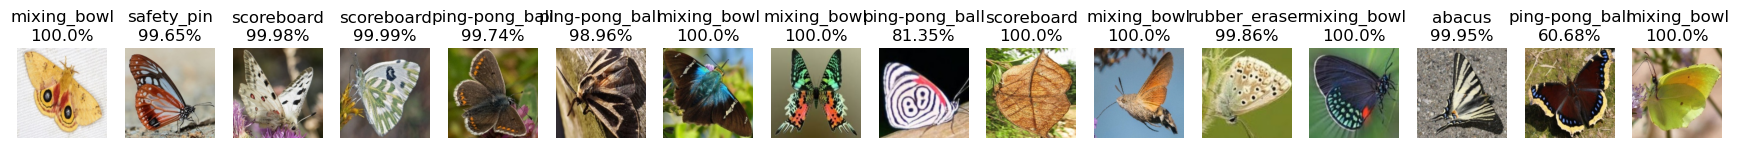

In [113]:
# 예측 모델 출력
print('xception')
predict_and_display(files_batch, titles, 'xception')

resnet50
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
[[('n02123597', 'Siamese_cat', 1.0), ('n02089973', 'English_foxhound', 1.7412995e-20), ('n07613480', 'trifle', 5.7471426e-23), ('n01855032', 'red-breasted_merganser', 1.1086913e-37), ('n15075141', 'toilet_tissue', 0.0)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
[[('n07613480', 'trifle', 1.0), ('n02123597', 'Siamese_cat', 2.9963896e-08), ('n02089973', 'English_foxhound', 5.636597e-19), ('n03706229', 'magnetic_compass', 4.6559754e-29), ('n01688243', 'frilled_lizard', 6.213022e-33)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
[[('n07613480', 'trifle', 0.9999856), ('n02089973', 'English_foxhound', 1.4388334e-05), ('n01855032', 'red-breasted_merganser', 3.061777e-25), ('n02356798', 'fox_squirrel', 2.9647182e-29), ('n01688243', 'frilled_lizard', 2.934384e-29)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
[[('n07613480', 'trifle', 1.0), ('n02089973', 'English_foxhound', 7.0748923e-12), ('n02123597', 'Siamese_cat', 1.980215e-21), ('n01855032', 'red-breasted_me

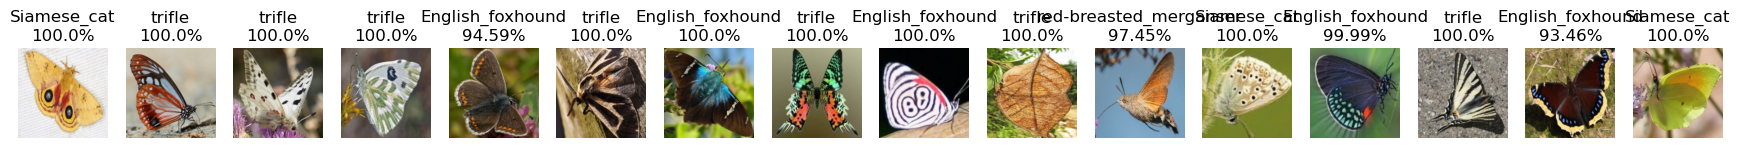

In [114]:
# 예측 모델 출력
print('resnet50')
predict_and_display(files_batch, titles, 'resnet50')

mobilenet
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
[[('n04209239', 'shower_curtain', 0.54808825), ('n03291819', 'envelope', 0.1090887), ('n03485794', 'handkerchief', 0.04192779), ('n04275548', 'spider_web', 0.01834525), ('n03938244', 'pillow', 0.012157519)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
[[('n03485794', 'handkerchief', 0.23485802), ('n04209239', 'shower_curtain', 0.100301206), ('n03938244', 'pillow', 0.05393156), ('n03291819', 'envelope', 0.043820426), ('n04548362', 'wallet', 0.031287592)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
[[('n04209239', 'shower_curtain', 0.66846204), ('n04589890', 'window_screen', 0.02558954), ('n03938244', 'pillow', 0.022790812), ('n03485794', 'handkerchief', 0.017482247), ('n04275548', 'spider_web', 0.017306592)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
[[('n03938244', 'pillow', 0.25255707), ('n04209239', 'shower_curtain', 0.18873423), ('n03485794', 'handkerchief', 0.06787486), ('n03291819', 'envelope', 0.052740443), ('n04548362', 'wallet', 0.02871475)]]
1/

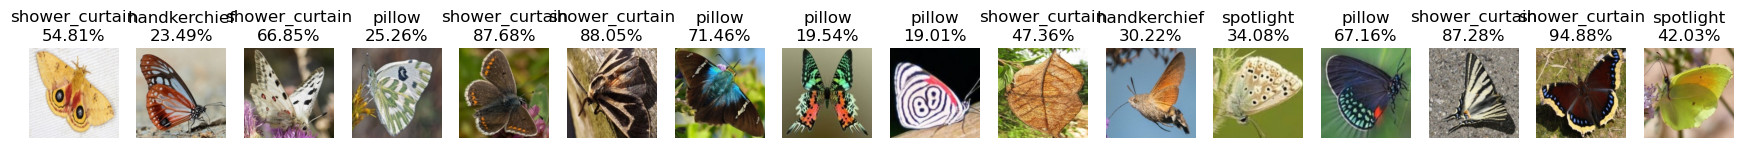

In [115]:
# 예측 모델 출력
print('mobilenet')
predict_and_display(files_batch, titles, 'mobilenet')

In [36]:
IMAGE_SIZE = 244
BATCH_SIZE = 16

In [37]:
from tensorflow.keras.applications.resnet50 import preprocess_input

train_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
validation_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

train_flow = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='file_paths',
    y_col='target_names',
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = "categorical",
    shuffle=True
)

validation_flow = validation_generator.flow_from_dataframe(
    dataframe=validation_df,
    x_col='file_paths',
    y_col='target_names',
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = "categorical"
)

test_flow = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='file_paths',
    y_col='target_names',
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = "categorical"
)
print(train_flow.class_indices)
print(validation_flow.class_indices)
print(test_flow.class_indices)

Found 8060 validated image filenames belonging to 100 classes.
Found 2015 validated image filenames belonging to 100 classes.
Found 2519 validated image filenames belonging to 100 classes.
{'ADONIS': 0, 'AFRICAN GIANT SWALLOWTAIL': 1, 'AMERICAN SNOOT': 2, 'AN 88': 3, 'APPOLLO': 4, 'ARCIGERA FLOWER MOTH': 5, 'ATALA': 6, 'ATLAS MOTH': 7, 'BANDED ORANGE HELICONIAN': 8, 'BANDED PEACOCK': 9, 'BANDED TIGER MOTH': 10, 'BECKERS WHITE': 11, 'BIRD CHERRY ERMINE MOTH': 12, 'BLACK HAIRSTREAK': 13, 'BLUE MORPHO': 14, 'BLUE SPOTTED CROW': 15, 'BROOKES BIRDWING': 16, 'BROWN ARGUS': 17, 'BROWN SIPROETA': 18, 'CABBAGE WHITE': 19, 'CAIRNS BIRDWING': 20, 'CHALK HILL BLUE': 21, 'CHECQUERED SKIPPER': 22, 'CHESTNUT': 23, 'CINNABAR MOTH': 24, 'CLEARWING MOTH': 25, 'CLEOPATRA': 26, 'CLODIUS PARNASSIAN': 27, 'CLOUDED SULPHUR': 28, 'COMET MOTH': 29, 'COMMON BANDED AWL': 30, 'COMMON WOOD-NYMPH': 31, 'COPPER TAIL': 32, 'CRECENT': 33, 'CRIMSON PATCH': 34, 'DANAID EGGFLY': 35, 'EASTERN COMA': 36, 'EASTERN DAPPLE WH

In [48]:
import numpy as np
from tensorflow.keras.utils import Sequence
from sklearn.utils import shuffle
import cv2

IMAGE_SIZE = 150
BATCH_SIZE = 64

class Dataset(Sequence):
    def __init__(self, file_paths, targets, batch_size=BATCH_SIZE, aug=None, preprocess=None, shuffle=False):
        self.file_paths = file_paths
        self.targets = targets
        self.batch_size = batch_size
        self.aug = aug
        self.preprocess = preprocess
        self.shuffle = shuffle

        if self.shuffle:
            self.on_epoch_end()

    def __len__(self):
        return int(np.ceil(len(self.targets) / self.batch_size))

    # batch_size 단위로 이미지 배열과 타켓 데이터들을 가져온 뒤 변환한 값을 리턴한다.
    def __getitem__(self, index):
        file_paths_batch = self.file_paths[index * self.batch_size: (index + 1) * self.batch_size]
        targets_batch = self.targets[index * self.batch_size: (index + 1) * self.batch_size]

        results_batch = np.zeros((file_paths_batch.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

        for i in range(file_paths_batch.shape[0]):
            image = cv2.cvtColor(cv2.imread(file_paths_batch[i]), cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))

            if self.aug is not None:
                image = self.aug(image=image)['image']

            if self.preprocess is not None:
                image = self.preprocess(image)
                    
            results_batch[i] = image

        return results_batch, targets_batch
        
    def on_epoch_end(self):
        if self.shuffle:
            self.file_paths, self.targets = shuffle(self.file_paths, self.targets)        

In [57]:
import albumentations as A
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input

train_file_paths = train_df['file_paths'].values
train_targets = pd.get_dummies(train_df['targets']).values

validation_file_paths = validation_df['file_paths'].values
validation_targets = pd.get_dummies(validation_df['targets']).values

test_file_paths = test_df['file_paths'].values
test_targets = pd.get_dummies(test_df['targets']).values


train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=vgg16_preprocess_input, 
                        shuffle=True)

validation_dataset = Dataset(validation_file_paths, 
                        validation_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=vgg16_preprocess_input)

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=vgg16_preprocess_input)

In [58]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception': # Inception을 기초로 한 모델
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(50, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(100, activation='softmax', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model

In [59]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# weights 저장
mcp_cb = ModelCheckpoint(
    filepath="./callback_files/1cycle/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

# 일정 기간 동안 성능이 개선되지 않을 시 학습률 동적으로 감소
rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

# 일정 기간 동안 성능이 개선되지 않을 시 학습 조기 중단
ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=2,
    mode='min'
)

In [60]:
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

model = create_model(model_name='vgg16', verbose=True)
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_4           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 50)                  │          25,6

 Total params: 14,745,438 (56.25 MB)

 Trainable params: 14,745,438 (56.25 MB)

 Non-trainable params: 0 (0.00 B)

In [61]:
import gc

# 메모리 해제 함수
gc.collect()

3838

In [53]:
# 반복횟수 지정
# 대문자로 상수를 표기하면 다른 부분에서 변경되지 않는다는 것을 의미
N_EPOCHS = 10

# 훈련
history = model.fit(train_dataset,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/10


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


126/126 ━━━━━━━━━━━━━━━━━━━━ 556s 4s/step - acc: 0.0120 - loss: 8.9052 - val_acc: 0.0149 - val_loss: 4.6042 - learning_rate: 0.0010
Epoch 2/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 510s 4s/step - acc: 0.0147 - loss: 4.6041 - val_acc: 0.0149 - val_loss: 4.6033 - learning_rate: 0.0010
Epoch 3/10
116/126 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - acc: 0.0136 - loss: 4.6033

KeyboardInterrupt: 

In [62]:
import albumentations as A
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess_input

train_file_paths = train_df['file_paths'].values
train_targets = pd.get_dummies(train_df['targets']).values

validation_file_paths = validation_df['file_paths'].values
validation_targets = pd.get_dummies(validation_df['targets']).values

test_file_paths = test_df['file_paths'].values
test_targets = pd.get_dummies(test_df['targets']).values


train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=resnet_preprocess_input, 
                        shuffle=True)

validation_dataset = Dataset(validation_file_paths, 
                        validation_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=resnet_preprocess_input)

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=resnet_preprocess_input)

In [63]:
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

model = create_model(model_name='resnet50', verbose=True)
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)    │ (None, 150, 150, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 156, 156, 3)       │               0 │ input_layer_6[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 75, 75, 64)        │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 77, 77, 64)        │               0 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 38, 38, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_bn        │ (None, 38, 38, 64)        │             256 │ pool1_pool[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_relu      │ (None, 38, 38, 64)        │               0 │ conv2_block1_preact_bn[0]… │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 38, 38, 64)        │           4,096 │ conv2_block1_preact_relu[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 38, 38, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 38, 38, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_pad            │ (None, 40, 40, 64)        │               0 │ conv2_block1_1_relu[0][0]  │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 38, 38, 64)        │          36,864 │ conv2_block1_2_pad[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 38, 38, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 38, 38, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │               

 Total params: 23,672,350 (90.30 MB)

 Trainable params: 23,626,910 (90.13 MB)

 Non-trainable params: 45,440 (177.50 KB)

In [64]:
import gc

# 메모리 해제 함수
gc.collect()

2216

In [65]:
# 반복횟수 지정
# 대문자로 상수를 표기하면 다른 부분에서 변경되지 않는다는 것을 의미
N_EPOCHS = 10

# 훈련
history = model.fit(train_dataset,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 764s 5s/step - acc: 0.0212 - loss: 4.6338 - val_acc: 0.0134 - val_loss: 9.3402 - learning_rate: 0.0010
Epoch 2/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 614s 5s/step - acc: 0.0521 - loss: 4.3330 - val_acc: 0.0352 - val_loss: 9.4061 - learning_rate: 0.0010
Epoch 3/10
 43/126 ━━━━━━━━━━━━━━━━━━━━ 6:34 5s/step - acc: 0.0928 - loss: 3.9245

KeyboardInterrupt: 

In [121]:
import albumentations as A
from tensorflow.keras.applications.mobilenet import preprocess_input as mobilenet_preprocess_input

train_file_paths = train_df['file_paths'].values
train_targets = pd.get_dummies(train_df['targets']).values

validation_file_paths = validation_df['file_paths'].values
validation_targets = pd.get_dummies(validation_df['targets']).values

test_file_paths = test_df['file_paths'].values
test_targets = pd.get_dummies(test_df['targets']).values


train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=mobilenet_preprocess_input, 
                        shuffle=True)

validation_dataset = Dataset(validation_file_paths, 
                        validation_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=mobilenet_preprocess_input)

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=mobilenet_preprocess_input)

In [122]:
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

model = create_model(model_name='mobilenet', verbose=True)
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

C:\Users\user\AppData\Local\Temp\ipykernel_68996\3265050429.py:19: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')


Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)   │ (None, 244, 244, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 122, 122, 32)      │             864 │ input_layer_12[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 122, 122, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 122, 122, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 122, 122, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 122, 122, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 122, 122, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 122, 122, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 122, 122, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 122, 122, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 122, 122, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 122, 122, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 123, 123, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 61, 61, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,327,134 (8.88 MB)

 Trainable params: 2,293,022 (8.75 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [124]:
import gc

# 메모리 해제 함수
gc.collect()

62783

In [125]:
# 반복횟수 지정
# 대문자로 상수를 표기하면 다른 부분에서 변경되지 않는다는 것을 의미
N_EPOCHS = 10

# 훈련
history = model.fit(train_dataset,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/10


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


213/504 ━━━━━━━━━━━━━━━━━━━━ 7:52 2s/step - acc: 0.0199 - loss: 4.6459

KeyboardInterrupt: 

In [167]:
IMAGE_SIZE = 244
BATCH_SIZE = 8

In [150]:
import numpy as np
from tensorflow.keras.utils import Sequence
from sklearn.utils import shuffle
import cv2

class Dataset(Sequence):
    def __init__(self, file_paths, targets, batch_size=BATCH_SIZE, aug=None, preprocess=None, shuffle=False):
        self.file_paths = file_paths
        self.targets = targets
        self.batch_size = batch_size
        self.aug = aug
        self.preprocess = preprocess
        self.shuffle = shuffle

        if self.shuffle:
            self.on_epoch_end()

    def __len__(self):
        return int(np.ceil(len(self.targets) / self.batch_size))

    # batch_size 단위로 이미지 배열과 타켓 데이터들을 가져온 뒤 변환한 값을 리턴한다.
    def __getitem__(self, index):
        file_paths_batch = self.file_paths[index * self.batch_size: (index + 1) * self.batch_size]
        targets_batch = self.targets[index * self.batch_size: (index + 1) * self.batch_size]

        results_batch = np.zeros((file_paths_batch.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

        for i in range(file_paths_batch.shape[0]):
            image = cv2.cvtColor(cv2.imread(file_paths_batch[i]), cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))

            if self.aug is not None:
                image = self.aug(image=image)['image']

            if self.preprocess is not None:
                image = self.preprocess(image)
                    
            results_batch[i] = image

        return results_batch, targets_batch
        
    def on_epoch_end(self):
        if self.shuffle:
            self.file_paths, self.targets = shuffle(self.file_paths, self.targets)        

In [151]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception': # Inception을 기초로 한 모델
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(50, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(100, activation='softmax', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model

In [158]:
import albumentations as A
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess_input

train_file_paths = train_df['file_paths'].values
train_targets = pd.get_dummies(train_df['targets']).values # CategoricalCrossEntropy

validation_file_paths = validation_df['file_paths'].values
validation_targets = pd.get_dummies(validation_df['targets']).values # CategoricalCrossEntropy

test_file_paths = test_df['file_paths'].values
test_targets = pd.get_dummies(test_df['targets']).values # CategoricalCrossEntropy

# 이미지 변환 (증강)
aug = A.Compose([
    # 크기 조정 및 회전
    A.ShiftScaleRotate(p=0.2),
    # 좌우 반전
    A.HorizontalFlip(p=0.2),
],p=0.3)


train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        aug= aug,
                        batch_size=BATCH_SIZE, 
                        preprocess=resnet_preprocess_input, 
                        shuffle=True)

validation_dataset = Dataset(validation_file_paths, 
                        validation_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=resnet_preprocess_input)

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=resnet_preprocess_input)

In [159]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# weights 저장
mcp_cb = ModelCheckpoint(
    filepath="./callback_files/1cycle/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

# 일정 기간 동안 성능이 개선되지 않을 시 학습률 동적으로 감소
rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

# 일정 기간 동안 성능이 개선되지 않을 시 학습 조기 중단
ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=2,
    mode='min'
)

In [163]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

# 모델 생성 함수를 사용하여 모델 생성
model = create_model(model_name='mobilenet', verbose=True)

# 모델 컴파일: 학습 프로세스 설정
# optimizer: 최적화 알고리즘, loss: 손실함수, metrics: 성능지표
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

C:\Users\user\AppData\Local\Temp\ipykernel_68996\3265050429.py:19: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')


Model: "functional_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_18 (InputLayer)   │ (None, 244, 244, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 122, 122, 32)      │             864 │ input_layer_18[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 122, 122, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 122, 122, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 122, 122, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 122, 122, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 122, 122, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 122, 122, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 122, 122, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 122, 122, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 122, 122, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 122, 122, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 123, 123, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 61, 61, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,327,134 (8.88 MB)

 Trainable params: 2,293,022 (8.75 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [164]:
import gc

# 메모리 해제 함수
gc.collect()

39587

In [165]:
# 반복횟수 지정
# 대문자로 상수를 표기하면 다른 부분에서 변경되지 않는다는 것을 의미
N_EPOCHS = 20

# 훈련
history = model.fit(train_dataset,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/20
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 1386s 1s/step - acc: 0.0126 - loss: 4.6343 - val_acc: 0.0164 - val_loss: 4.5992 - learning_rate: 0.0010
Epoch 2/20
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 1158s 1s/step - acc: 0.0127 - loss: 4.6032 - val_acc: 0.0149 - val_loss: 4.6000 - learning_rate: 0.0010
Epoch 3/20
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 1181s 1s/step - acc: 0.0177 - loss: 4.5993 - val_acc: 0.0149 - val_loss: 4.5988 - learning_rate: 0.0010
Epoch 4/20
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 1127s 1s/step - acc: 0.0150 - loss: 4.5935 - val_acc: 0.0149 - val_loss: 4.6124 - learning_rate: 0.0010
Epoch 5/20
 124/1008 ━━━━━━━━━━━━━━━━━━━━ 15:15 1s/step - acc: 0.0110 - loss: 4.6034

KeyboardInterrupt: 

In [174]:
IMAGE_SIZE = 224
BATCH_SIZE = 32

In [175]:
import numpy as np
from tensorflow.keras.utils import Sequence
from sklearn.utils import shuffle
import cv2

class Dataset(Sequence):
    def __init__(self, file_paths, targets, batch_size=BATCH_SIZE, aug=None, preprocess=None, shuffle=False):
        self.file_paths = file_paths
        self.targets = targets
        self.batch_size = batch_size
        self.aug = aug
        self.preprocess = preprocess
        self.shuffle = shuffle

        if self.shuffle:
            self.on_epoch_end()

    def __len__(self):
        return int(np.ceil(len(self.targets) / self.batch_size))

    # batch_size 단위로 이미지 배열과 타켓 데이터들을 가져온 뒤 변환한 값을 리턴한다.
    def __getitem__(self, index):
        file_paths_batch = self.file_paths[index * self.batch_size: (index + 1) * self.batch_size]
        targets_batch = self.targets[index * self.batch_size: (index + 1) * self.batch_size]

        results_batch = np.zeros((file_paths_batch.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

        for i in range(file_paths_batch.shape[0]):
            image = cv2.cvtColor(cv2.imread(file_paths_batch[i]), cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))

            if self.aug is not None:
                image = self.aug(image=image)['image']

            if self.preprocess is not None:
                image = self.preprocess(image)
                    
            results_batch[i] = image

        return results_batch, targets_batch
        
    def on_epoch_end(self):
        if self.shuffle:
            self.file_paths, self.targets = shuffle(self.file_paths, self.targets)        

In [176]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception': # Inception을 기초로 한 모델
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(256, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(100, activation='softmax', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model

In [177]:
import albumentations as A
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess_input

train_file_paths = train_df['file_paths'].values
train_targets = pd.get_dummies(train_df['targets']).values # CategoricalCrossEntropy

validation_file_paths = validation_df['file_paths'].values
validation_targets = pd.get_dummies(validation_df['targets']).values # CategoricalCrossEntropy

test_file_paths = test_df['file_paths'].values
test_targets = pd.get_dummies(test_df['targets']).values # CategoricalCrossEntropy

# 이미지 변환 (증강)
aug = A.Compose([
    # 크기 조정 및 회전
    A.ShiftScaleRotate(p=0.2),
    # 좌우 반전
    A.HorizontalFlip(p=0.2),
],p=0.3)


train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        aug= aug,
                        batch_size=BATCH_SIZE, 
                        preprocess=resnet_preprocess_input, 
                        shuffle=True)

validation_dataset = Dataset(validation_file_paths, 
                        validation_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=resnet_preprocess_input)

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=resnet_preprocess_input)

In [178]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

# 모델 생성 함수를 사용하여 모델 생성
model = create_model(model_name='vgg16', verbose=True)

# 모델 컴파일: 학습 프로세스 설정
# optimizer: 최적화 알고리즘, loss: 손실함수, metrics: 성능지표
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

Model: "functional_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_20 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_16          │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 256)                 │         131,3

 Total params: 14,871,716 (56.73 MB)

 Trainable params: 14,871,716 (56.73 MB)

 Non-trainable params: 0 (0.00 B)

In [180]:
import gc

# 메모리 해제 함수
gc.collect()

0

In [181]:
# 반복횟수 지정
# 대문자로 상수를 표기하면 다른 부분에서 변경되지 않는다는 것을 의미
N_EPOCHS = 20

# 훈련
history = model.fit(train_dataset,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 2747s 11s/step - acc: 0.0095 - loss: 10.4631 - val_acc: 0.0149 - val_loss: 4.5965 - learning_rate: 0.0010
Epoch 2/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 1263s 5s/step - acc: 0.0141 - loss: 4.5984 - val_acc: 0.0154 - val_loss: 4.5752 - learning_rate: 0.0010
Epoch 3/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 1268s 5s/step - acc: 0.0142 - loss: 4.5914 - val_acc: 0.0303 - val_loss: 4.5226 - learning_rate: 0.0010
Epoch 4/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 1392s 6s/step - acc: 0.0235 - loss: 4.4938 - val_acc: 0.0263 - val_loss: 4.3873 - learning_rate: 0.0010
Epoch 5/20
202/252 ━━━━━━━━━━━━━━━━━━━━ 7:40 9s/step - acc: 0.0385 - loss: 4.1133

KeyboardInterrupt: 

In [ ]:
# freeze 확인하기
for i, layer in enumerate(model.layers[:-5]):
    layer.trainable = False
    print(i + 1, '.', layer.name, 'trainable:', layer.trainable)

print('\n######### classifier layers ######### ')
for layer in model.layers[-5:]:
    print(layer.name, 'trainable:', layer.trainable)

In [ ]:
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet50_preprocess_input
from tensorflow.keras import layers

def fine_tune(datas, model_name, aug, preprocess):
    FIRST_EPOCHS = 10
    SECOND_EPOCHS = 10
    
    train_file_paths, train_targets, \
    validation_file_paths, validation_targets, \
    test_file_paths, test_targets = datas

    train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        batch_size=BATCH_SIZE, 
                        aug=aug, 
                        preprocess=preprocess, 
                        shuffle=True)

    validation_dataset = Dataset(validation_file_paths, 
                            validation_targets, 
                            batch_size=BATCH_SIZE, 
                            preprocess=preprocess)
    
    model = create_model(model_name=model_name, verbose=True)
    model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['acc'])

    # feature extractor layer들을 전부 freeze
    for layer in model.layers[:-5]:
        layer.trainable = False

    model.fit(train_dataset, 
              batch_size=BATCH_SIZE, 
              epochs=FIRST_EPOCHS, 
              validation_data=validation_dataset)

    # 배치 정규화만 freeze 진행
    for layer in model.layers:
        if not isinstance(layer, layers.BatchNormalization):
            layer.trainable = True

    # 부분 freeze 진행
    for layer in model.layers[:85]:
        layer.trainable = False
    
    model.compile(optimizer=Adam(0.00001), loss=BinaryCrossentropy(), metrics=['acc'])
    history = model.fit(train_dataset, 
              batch_size=BATCH_SIZE, 
              epochs=SECOND_EPOCHS, 
              validation_data=validation_dataset)
    
    return model, history

In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet50_preprocess_input
import albumentations as A

train_file_paths = train_df['file_paths'].values
train_targets = train_df['targets'].values

validation_file_paths = validation_df['file_paths'].values
validation_targets = validation_df['targets'].values

aug = A.Compose([
    A.ShiftScaleRotate(p=0.5),
    A.HorizontalFlip(p=0.5),
],p=0.3)

model, history = fine_tune((train_file_paths, train_targets,
           validation_file_paths, validation_targets,
           test_file_paths, test_targets),
          'resnet50', 
          aug,
          resnet50_preprocess_input)

In [ ]:
test_file_paths = test_df['file_paths'].values
test_targets = test_df['targets'].values

test_dataset = Dataset(test_file_paths, 
                            test_targets, 
                            batch_size=BATCH_SIZE, 
                            preprocess=resnet50_preprocess_input)

model.evaluate(test_dataset, batch_size=BATCH_SIZE)

In [ ]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    
show_history(history)